## 12.1 分类数据 

In [1]:
import pandas as pd
import numpy as np

In [2]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
print(values)
print(pd.unique(values))
pd.value_counts(values)

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object
['apple' 'orange']


apple     6
orange    2
dtype: int64

In [3]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

### pandas的分类类型 

In [4]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,10,2.469246
1,1,orange,9,0.118019
2,2,apple,13,1.956896
3,3,apple,10,3.743902
4,4,apple,12,2.165166
5,5,orange,14,1.741725
6,6,apple,12,0.522694
7,7,apple,14,0.257601


In [7]:
#把python字符串对象的数组变为分类
fruit_cat = df['fruit'].astype('category')
fruit_cat #pandas.Categorical实例

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [8]:
c = fruit_cat.values #return series as ndarray or ndarray-like depending on the dtype
print(type(c))
#分类对象有categories 和 codes属性
print(c.categories)
print(c.codes)

<class 'pandas.core.arrays.categorical.Categorical'>
Index(['apple', 'orange'], dtype='object')
[0 1 0 0 0 1 0 0]


In [19]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [21]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
print(my_categories.codes)
my_categories

[2 0 1 2 0]


[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [22]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

与显示指定不同，分类变换不认定指定的分类顺序。因此取决于输入数据的顺序，categories数组的顺序会不同。当使用from_codes或其他构造器时，你可以指定分类一个有意义的顺序。

In [23]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)
ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [24]:
#输出[foo<bar<baz]，无序的分类实例可以通过as_ordered排序
my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

### 用分类进行计算 

In [25]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [28]:
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [32]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print(type(bins))
print(bins)
bins.codes[:10]

<class 'pandas.core.arrays.categorical.Categorical'>
[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]


array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [35]:
#加上标签的面元分类不包含数据面元边界的信息，可以用groupby提取一些汇总信息
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [37]:
results['quartile'] #还是categories实例

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

### 用分类提高性能 

标签使用的内存远比分类的多
但是转换为分类不是没有代价的，主要是格式转换需要花费一些时间

In [45]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))
categories = labels.astype('category')

In [46]:
print(labels.memory_usage())
print(categories.memory_usage())

80000080
10000272


In [47]:
%time _=labels.astype('category')

Wall time: 361 ms


### 分类方法

In [57]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
print(type(cat_s)) #本质还是series
cat_s

<class 'pandas.core.series.Series'>


0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [58]:
print(cat_s.cat.codes) #cat属性提供分类方法的入口
print(cat_s.cat.categories)

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8
Index(['a', 'b', 'c', 'd'], dtype='object')


In [60]:
#假如我们知道这个数据的实际分类集，超出了原数据中的值种类数，可以使用set_categories来改变
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

In [64]:
print(cat_s.value_counts())
print(cat_s2.value_counts())

d    2
c    2
b    2
a    2
dtype: int64
d    2
c    2
b    2
a    2
e    0
dtype: int64


在大数据集中， 分类经常作为节省内存和高性能的便捷工具

In [68]:
#许多分类不出现在数据中，可以使用remove_unused_categories删除没看到的分类
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
print(cat_s3)
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]


0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

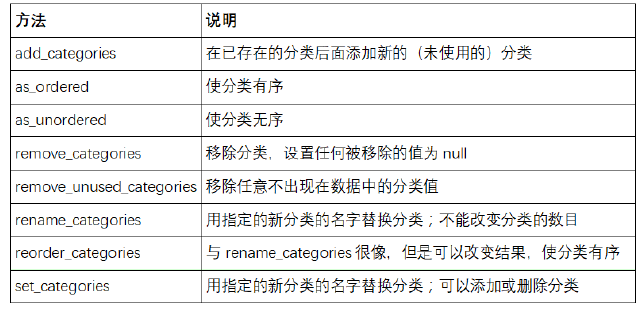

### 为建模创建虚拟变量

In [69]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 12.2 GroupBy高级应用 

transform方法：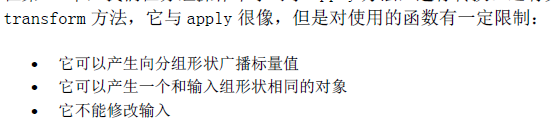

In [70]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [71]:
g = df.groupby('key').value
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [72]:
g.transform(lambda x:x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [73]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

transform函数返回series，但是结果必须与输入大小相同

In [75]:
g.transform(lambda x: x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [77]:
g.transform(lambda x: x.rank(ascending=False)) #计算每个分组的降序排名

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [79]:
def normalize(x):
    return (x - x.mean())/x.std()
print(g.transform(normalize))
print(g.apply(normalize))

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64
0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64


In [86]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

### 分组的时间重采样 

In [94]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time':times, 'value':np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [95]:
#time做索引。重采样(改变采样时间频率，对重新划分的频率范围内时间做运算，此处是count)
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [96]:
times.repeat(3)

DatetimeIndex(['2017-05-20 00:00:00', '2017-05-20 00:00:00',
               '2017-05-20 00:00:00', '2017-05-20 00:01:00',
               '2017-05-20 00:01:00', '2017-05-20 00:01:00',
               '2017-05-20 00:02:00', '2017-05-20 00:02:00',
               '2017-05-20 00:02:00', '2017-05-20 00:03:00',
               '2017-05-20 00:03:00', '2017-05-20 00:03:00',
               '2017-05-20 00:04:00', '2017-05-20 00:04:00',
               '2017-05-20 00:04:00', '2017-05-20 00:05:00',
               '2017-05-20 00:05:00', '2017-05-20 00:05:00',
               '2017-05-20 00:06:00', '2017-05-20 00:06:00',
               '2017-05-20 00:06:00', '2017-05-20 00:07:00',
               '2017-05-20 00:07:00', '2017-05-20 00:07:00',
               '2017-05-20 00:08:00', '2017-05-20 00:08:00',
               '2017-05-20 00:08:00', '2017-05-20 00:09:00',
               '2017-05-20 00:09:00', '2017-05-20 00:09:00',
               '2017-05-20 00:10:00', '2017-05-20 00:10:00',
               '2017-05-

In [100]:
df2 = pd.DataFrame({'time':times.repeat(3),
                    'key':np.tile(['a', 'b', 'c'], N),
                    'value':np.arange(N*3.)})
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [101]:
time_key = pd.TimeGrouper('5min')
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())
resampled

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [102]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


使用TimeGrouper的限制是时间必须是Series或DataFrame的索引

## 链式编程技术 

```python
df = load_data()
df2 = df[df['col2'] < 0]
df2['col1_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()
```

```python
# Usual non-functional way
df2 = df.copy()
df2['k'] = v

# Functional assign way
df2 = df.assign(k=v)
```

```python
result = (df2.assign(col1_demeaned=df2.col1 - df2.col2.mean())
          .groupby('key')
          .col1_demeaned.std())
```

```python
result = (load_data()
          [lambda x: x.col2 < 0]
          .assign(col1_demeaned=lambda x: x.col1 - x.col1.mean())
          .groupby('key')
          .col1_demeaned.std())
```

### 管道方法 

```python
a = f(df, arg1=v1)
b = g(a, v2, arg3=v3)
c = h(b, arg4=v4)
```

```python
#f(df)和df.pipe(f)是等价的
result = (df.pipe(f, arg1=v1)
          .pipe(g, v2, arg3=v3)
          .pipe(h, arg4=v4))
```

pipe的另一个有用的地方是提炼操作作为可复用的函数

```python
g = df.groupby(['key1', 'key2'])
df['col1'] = df['col1'] - g.transform('mean')
```

```python
def group_demean(df, by, cols):
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean')
    return result
```

```python
result = (df[df.col1 < 0]
          .pipe(group_demean, ['key1', 'key2'], ['col1']))
```